In [3]:
library(quantmod)
library(xts)
library(dplyr)
library(rugarch)
library(rmgarch)
library(PerformanceAnalytics)
library(quadprog)
library(FinTS)
library(tseries)
library(e1071)
library(forecast)
library(ggplot2)

In [4]:
data <- read.csv("portfolio_2015_2025.csv")

In [5]:
colSums(is.na(data))

X     GAZP     MGNT     MTSS     NLMK     SBER ret_GAZP ret_MGNT 
       0        0        0        0        0        0        0        0 
ret_MTSS ret_NLMK ret_SBER 
       0        0        0

In [6]:
head(data)

,X,GAZP,MGNT,MTSS,NLMK,SBER,ret_GAZP,ret_MGNT,ret_MTSS,ret_NLMK,ret_SBER
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-01-06,138.92,10400,179.90,66.700,58.28,0.03643163,0.051596984,0.02933092,0.006241326,0.033321879
2,2015-01-08,146.46,10627,190.05,67.410,65.70,0.05285413,0.021592126,0.05488605,0.010588422,0.119839944
3,2015-01-09,141.70,10542,195.00,67.900,63.10,-0.03304021,-0.008030654,0.02571236,0.007242660,-0.040378156
4,2015-01-12,140.22,10689,193.00,70.120,62.90,-0.01049953,0.013847897,-0.01030937,0.032172025,-0.003174606
5,2015-01-13,142.64,11180,204.50,72.505,60.31,0.01711136,0.044911292,0.05787779,0.033447465,-0.042048236
6,2015-01-14,146.30,11450,210.20,72.350,60.05,0.02533533,0.023863262,0.02749148,-0.002140072,-0.004320379


In [7]:
ret_GAZP <- data$ret_GAZP # Газпром - энергетика
ret_MGNT <- data$ret_MGNT # Магнит - сеть розничных магазинов
ret_MTSS <- data$ret_MTSS # МТС - телекоммуникационные услуги
ret_NLMK <- data$ret_NLMK # НЛМК(Новолипецкий металлургический комбинат) - металлургия
ret_SBER <- data$ret_SBER # СберБанк - финансы

In [8]:
adf.test(ret_GAZP)
adf.test(ret_MGNT)
adf.test(ret_MTSS)
adf.test(ret_NLMK)
adf.test(ret_SBER)

Warning message in adf.test(ret_GAZP):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ret_GAZP
Dickey-Fuller = -13.339, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(ret_MGNT):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ret_MGNT
Dickey-Fuller = -14.544, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(ret_MTSS):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ret_MTSS
Dickey-Fuller = -13.878, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(ret_NLMK):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ret_NLMK
Dickey-Fuller = -12.945, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(ret_SBER):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ret_SBER
Dickey-Fuller = -13.523, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


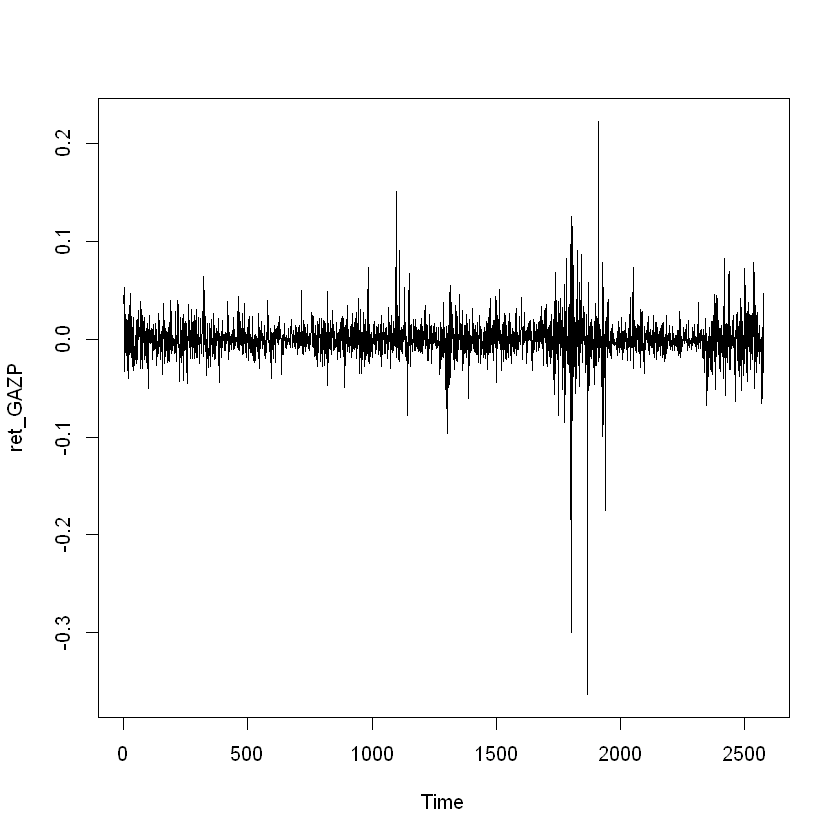

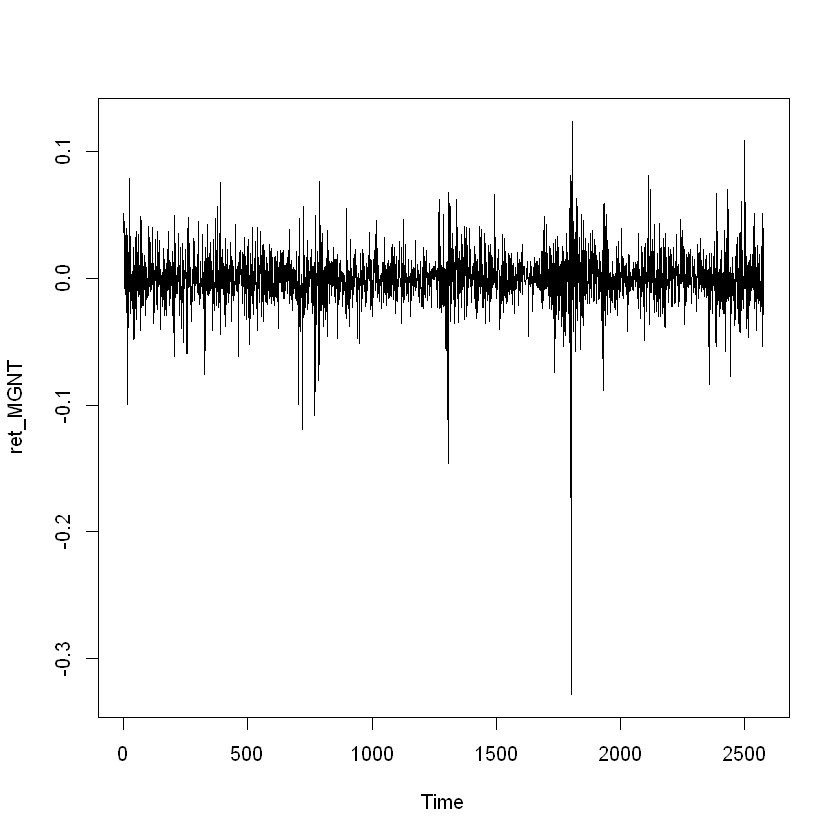

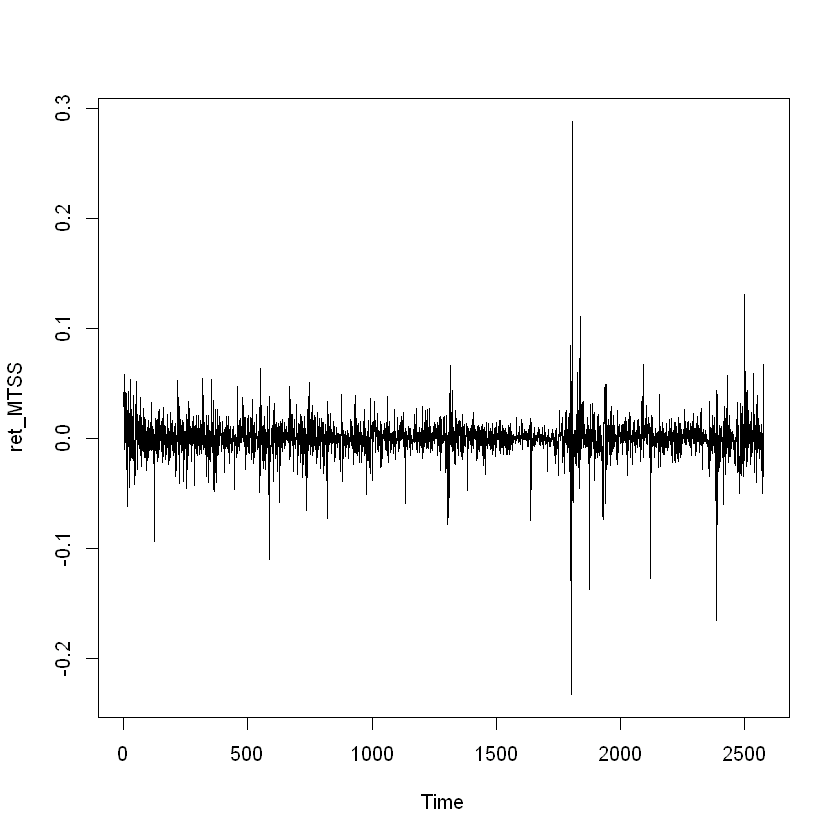

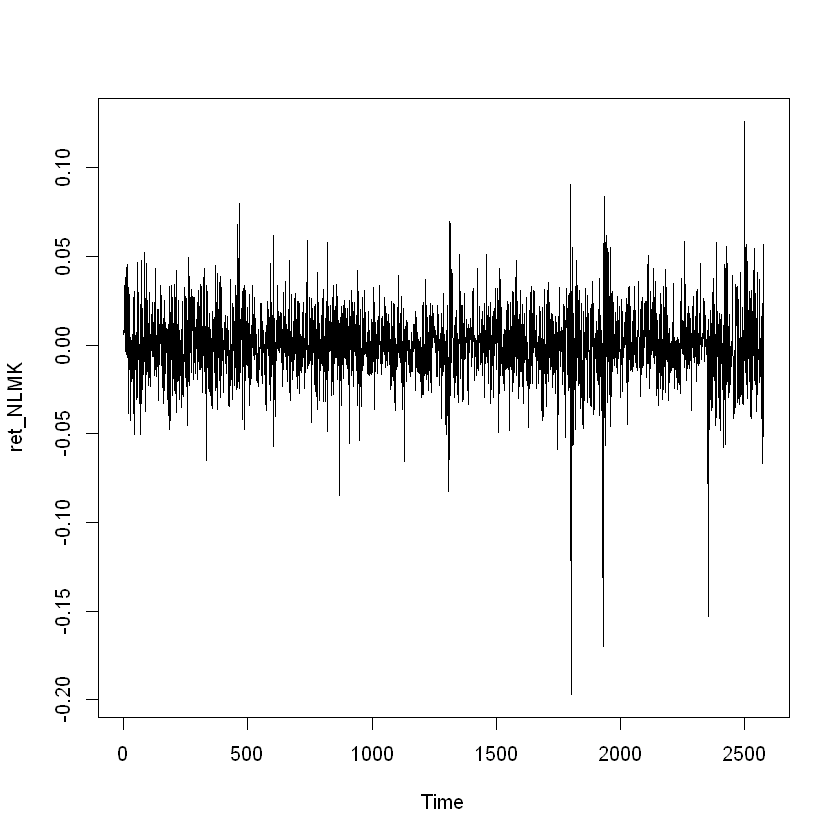

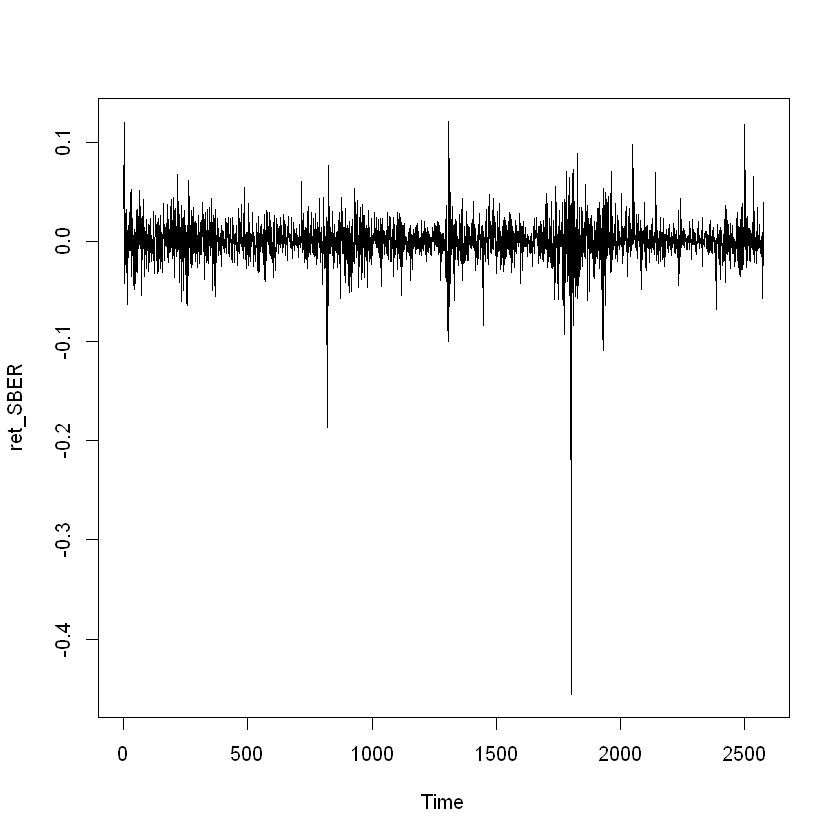

In [9]:
plot.ts(ret_GAZP)
plot.ts(ret_MGNT)
plot.ts(ret_MTSS)
plot.ts(ret_NLMK)
plot.ts(ret_SBER)